# Fantasy Football Projections: CMSC320 Final Tutorial
### by Amal Verma

American Football is by far the most popular sport in the United States. Every year, the 32 teams spread across the United States of America play against each other all with the hopes of winning the Super Bowl at the end of the season. And every year, people from all around the world tune in to watch these games and cheer for their favorite teams. In fact, the National Football League, the most popular American professional football league, has the highest average attendance of any professional sports league in the world. <br>
<br>
With such a dedicated fanbase, it is no wonder that there are so many fan games associated with the sport. One of the most popular games is Fantasy Football. Fantasy Football is a game that allows you to be the owner, General Manager and coach of your very own football team. In this game, a group of people get together and draft a team made up of NFL players. This way every team in the fantasy league has different players. Then, based on a NFL player's on-field performance in a given week, the person with that MFL player on their team scores points. The person whose team ends up having a higher total points by the end of the week wins the week. Each week a person goes against a different person's team. If a NFL player is struggling, a person can release him, just like in the real NFL. A person can also trade with other teams. And if no one has a NFL player on their team, they are available to be added to a person's roster from the waiver wire. Just like the real NFL, every Fantasy league has a postseason as well. The fantasy playoffs are usually played from Weeks 14-16. In the final week, a champion is crowned! <br>
<br>
In this tutorial, I hope to be able to accurately predict how well a player will perform in fantasy football based on their past years' data. If this tutorial works out well, people can use this model to better draft players in their own fantasy football teams. If people can use this model to figure out how well a player will perform for their fantasy team, they can better prioritize their draft picks. Now obviously this model can not account for external factors, such as injuries that may occur during a season, however the model should be able to pick up trends based on age, time period, and other statistics to accurately assess potential for most players. Now since football has many different positions with many different roles, I will focus on certain positions to see which players have the most potential for their respective position. The positions I will be focussing on are Quarterbacks, Runningbacks, Wide Recievers, and Tight Ends.

## Starting the Data Science

In [126]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Above, I just imported all the packages I will be needing for this tutorial.

First, I will first need to create a data frame with all the quarterback information from all the years from 1992 to 2019 inclusive. The reason I chose to start at 1992 is because fantasy football has changed drastically over the years, and while this will be helpful in determining how future years will play out, the NFL did not start tracking Targets until 1992. Since I wanted to see if this attribute played a significant role in Fantasy Points, I wanted to use data that included this attribute, and therefore I started at 1992. The reason I ended at 2019 is because that is when the data I chose ended. <br>
<br>
The data set I used can be downloaded from https://www.fantasyfootballdatapros.com/csv_files. I downloaded Fantasy Stats by clicking the button that said "Download Fantasy Stats."

## Data Collection

In [66]:
all_data_frame = []
for i in range(1992, 2020):
    df = pd.read_csv('Data/' + str(i) + '.csv')
    df['Year'] = [i for j in range(len(df))]
    all_data_frame.append(df)
fantasy_df = pd.concat(all_data_frame)
fantasy_df.head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,...,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Year
0,0,Emmitt Smith,DAL,RB,23.0,16.0,16.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1713.0,18.0,373.0,335.0,1.0,369.8,1992
1,1,Thurman Thomas,BUF,RB,26.0,16.0,16.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1487.0,9.0,312.0,626.0,3.0,329.3,1992
2,2,Barry Foster,PIT,RB,24.0,16.0,15.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1690.0,11.0,390.0,344.0,0.0,287.4,1992
3,3,Terry Allen,MIN,RB,24.0,16.0,16.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1201.0,13.0,266.0,478.0,2.0,288.9,1992
4,4,Steve Young,SFO,QB,31.0,16.0,16.0,268.0,402.0,3465.0,...,3465.0,25.0,402.0,537.0,4.0,76.0,0.0,0.0,284.3,1992


In the above code, I had different data sets for every year, so I had to combine all the data sets into one major data set. In order to do this, I first created an array object in which I would store all of the indivual year data as data frames. Then I created a for loop that would go through every CSV file I had and create a data frame with the data in each file. In the same for loop I would also append the data frame that was created into the array object I created before the for loop. At the end of the for loop I had populated the entire array with data frame corresponding to data from the years 1992 to 2019 inclusive. I then concatenated all the lists in the array together to create one big data frame with all the data across all the years, and I made sure to have a year attribute so that it was obvious which data came from which year, since I was also going to see if year played a factor in fantasy points.

In [67]:
fantasy_df.columns

Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints', 'Year'],
      dtype='object')

Above, I checked the columns in the current data frame. It appears that from concatenating the data frames from all the years, the indices of all the rows got messed up, so I have to fix that. I also have an extra column called 'Unnamed:0' that was the old indices of all the data frames, so I have to remove that. Furthermore, it appears some of the Column names could be better named, so I will make the names more descriptive. It also appears that there are some duplicate columns, so I will have to drop those as well.

## Data Management and Representation

In [68]:
fantasy_df = fantasy_df.reset_index()
fantasy_df.columns

Index(['index', 'Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp',
       'Att', 'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R',
       'Fumbles', 'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt',
       'RushingYds', 'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints', 'Year'],
      dtype='object')

In [69]:
fantasy_df.drop(columns=['index', 'Unnamed: 0'], inplace=True)
fantasy_df.head()

,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,Int,...,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Year
0,Emmitt Smith,DAL,RB,23.0,16.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1713.0,18.0,373.0,335.0,1.0,369.8,1992
1,Thurman Thomas,BUF,RB,26.0,16.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1487.0,9.0,312.0,626.0,3.0,329.3,1992
2,Barry Foster,PIT,RB,24.0,16.0,15.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1690.0,11.0,390.0,344.0,0.0,287.4,1992
3,Terry Allen,MIN,RB,24.0,16.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1201.0,13.0,266.0,478.0,2.0,288.9,1992
4,Steve Young,SFO,QB,31.0,16.0,16.0,268.0,402.0,3465.0,7.0,...,3465.0,25.0,402.0,537.0,4.0,76.0,0.0,0.0,284.3,1992


In [70]:
fantasy_df = fantasy_df.rename(columns={'Tm':'Team', 'Pos':'Position', 'G':'Games', 'GS':'GameStarted','Cmp':'Completions', 'Att':'PassingAttempts', 'Yds':'PassingYards', 'Int':'InterceptionsThrown', 'Att.1':'RushingAttempts', 'Yds.1':'RushingYards', 'Tgt':'Targets', 'Rec':'Receptions', 'Yds.2':'ReceivingYards', 'Y/R':'Yards per Reception'})
fantasy_df.drop(columns=['PassingYds', 'PassingAtt', 'RushingYds', 'RushingAtt', 'ReceivingYds'], inplace=True)
fantasy_df.columns

Index(['Player', 'Team', 'Position', 'Age', 'Games', 'GameStarted',
       'Completions', 'PassingAttempts', 'PassingYards', 'InterceptionsThrown',
       'RushingAttempts', 'RushingYards', 'Targets', 'Receptions',
       'ReceivingYards', 'Yards per Reception', 'Fumbles', 'FumblesLost',
       'PassingTD', 'RushingTD', 'ReceivingTD', 'FantasyPoints', 'Year'],
      dtype='object')

Above are the more updated column names after I removed what I needed to and renamed everything to be more descriptive. Now below is the final data frame.

In [71]:
fantasy_df.head()

,Player,Team,Position,Age,Games,GameStarted,Completions,PassingAttempts,PassingYards,InterceptionsThrown,...,Receptions,ReceivingYards,Yards per Reception,Fumbles,FumblesLost,PassingTD,RushingTD,ReceivingTD,FantasyPoints,Year
0,Emmitt Smith,DAL,RB,23.0,16.0,16.0,0.0,0.0,0.0,0.0,...,59.0,335.0,5.68,4.0,0.0,0.0,18.0,1.0,369.8,1992
1,Thurman Thomas,BUF,RB,26.0,16.0,16.0,0.0,0.0,0.0,0.0,...,58.0,626.0,10.79,6.0,0.0,0.0,9.0,3.0,329.3,1992
2,Barry Foster,PIT,RB,24.0,16.0,15.0,0.0,1.0,0.0,0.0,...,36.0,344.0,9.56,9.0,0.0,0.0,11.0,0.0,287.4,1992
3,Terry Allen,MIN,RB,24.0,16.0,16.0,0.0,0.0,0.0,0.0,...,49.0,478.0,9.76,9.0,0.0,0.0,13.0,2.0,288.9,1992
4,Steve Young,SFO,QB,31.0,16.0,16.0,268.0,402.0,3465.0,7.0,...,0.0,0.0,0.00,9.0,0.0,25.0,4.0,0.0,284.3,1992


### Explaining the Columns/Attributes

_Player_: Has the player name is the form "Firstname Lastname" <br>
_Team_: Has a 3 letter abbreviation for the team the player is on during the year <br>
_Position_: Has the 2 letter abbreviation for the position the player plays (QB, RB, TE, WR) <br>
_Age_: Has the age of the player during the year <br>
_Games_: Number of games a player had during the year <br>
_GameStarted_: Number of games a player started in during the year <br>
_Completions_: Number of times a player has thrown a ball and the ball was caught by a teammate during the year <br>
_PassingAttempts_: Number of passes a player makes during the year <br>
_PassingYards_: Total number of yards a player a thrown a completed ball during the year <br>
_InterceptionsThrown_: Total number of times a player has thrown a ball to the other team during the year <br>
_RushingAttempts_: Total number of times a player tried to run the ball during the year <br>
_RushingYards_: Total number of yards a player has run the ball during the year <br>
_Targets_: Total number of times a player has been thrown the ball to during the year <br>
_Receptions_: Total number of times a player has caught the ball during the year <br>
_ReceivingYards_: Total number of yards a player caught the ball from during the year<br>
_Yards per Reception_: ReceivingYards divided by Receptions for a player <br>
_Fumbles_: Number of times a player drops the ball during the year <br>
_FumblesLost_: Number of times a player drops the ball during the year and the other team gets the ball <br>
_PassingTD_: Number of times a player passed a ball to a player and the player got a touchdown <br>
_RushingTD_: Number of times a player ran the ball into the touchdown <br>
_ReceivingTD_: Number of times a player caught the ball and got a touchdown <br>
_FantasyPoints_: The amount of fantasy points a player got during the year <br>
_Year_: The current year <br>

Now that I have a full data frame with all the data I need, I can start checking the data itself out. First we can checkout quarterbacks.

## Quarterbacks

The first position we will be focussing on is the quarterback position. In football, every team only has one quarterback on the field at a time. The quarterback is an offensive position, and the role of the quarterback for the team is to throw the ball to the wide recievers or hand the ball off to the running backs. There are also times the quarterback runs the ball themselves.

### Exploratory Data Analysis

The first thing I want to see is how the point distribution of quarterbacks changed based on the time period. The reason for this is because as time went on, the role of the quarterback became more influential in the game, so I want to see if that is reflected in Fantasy Football.

In [72]:
quarterback_df = fantasy_df[fantasy_df['Position'] == 'QB'].copy()
quarterback_df.head()

,Player,Team,Position,Age,Games,GameStarted,Completions,PassingAttempts,PassingYards,InterceptionsThrown,...,Receptions,ReceivingYards,Yards per Reception,Fumbles,FumblesLost,PassingTD,RushingTD,ReceivingTD,FantasyPoints,Year
4,Steve Young,SFO,QB,31.0,16.0,16.0,268.0,402.0,3465.0,7.0,...,0.0,0.0,0.0,9.0,0.0,25.0,4.0,0.0,284.30,1992
15,Randall Cunningham,PHI,QB,29.0,15.0,15.0,233.0,384.0,2775.0,11.0,...,0.0,0.0,0.0,13.0,0.0,19.0,5.0,0.0,223.90,1992
18,Dan Marino,MIA,QB,31.0,16.0,16.0,330.0,554.0,4116.0,16.0,...,0.0,0.0,0.0,5.0,0.0,24.0,0.0,0.0,225.24,1992
23,Troy Aikman,DAL,QB,26.0,16.0,16.0,302.0,473.0,3445.0,14.0,...,0.0,0.0,0.0,4.0,0.0,23.0,1.0,0.0,210.30,1992
30,Jim Kelly,BUF,QB,32.0,16.0,16.0,269.0,462.0,3457.0,19.0,...,0.0,0.0,0.0,8.0,0.0,23.0,1.0,0.0,187.58,1992


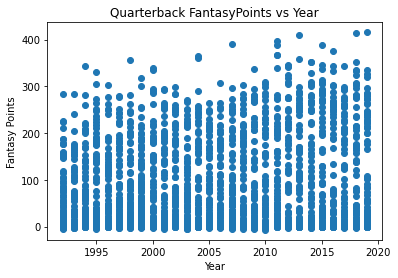

In [73]:
# Plotting Fantasy Points of Quarterbacks during different years
plt.scatter(quarterback_df["Year"], quarterback_df["FantasyPoints"])
plt.title("Quarterback FantasyPoints vs Year")
plt.xlabel("Year")
plt.ylabel("Fantasy Points")
plt.show()

It looks like while the minimum points stayed the same, the maximum points scored by quarterbacks seems to increase with time. Let's make a Violin Graph to see if the distributions changed at all throughout the years.

In [74]:
# Data wrangling to create violin plot
fantasy_points_per_year = [] # will store list of life expectancies per year in data frame
years = [] # will store years with data in data frame
for year in range(1992, 2019): # goes through range of years
    year_data = []
    for row in range(len(quarterback_df)):
        count = 0
        if quarterback_df.iloc[row]["Year"] == year and count == 0:
            count = count + 1
            year_data.append(quarterback_df.iloc[row]['FantasyPoints'])
    if year_data != []: # if the year has data then add it
        years.append(year)
        fantasy_points_per_year.append(year_data)

Text(0.5, 1.0, 'Violin Plot')

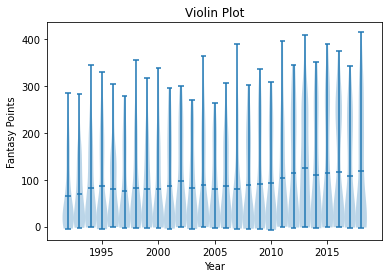

In [75]:
# Violin Plot
fig, ax = plt.subplots()

ax.violinplot(fantasy_points_per_year,years,widths=1,showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("Fantasy Points")
ax.set_title("Violin Plot")

From the violin plot above, it appears that the Quarterback position did on average increase in fantasy points as the years increased, however, the growth was very inconsistent on average. It also appears that every year was very top skewed in terms of Quarterback fantasy point distribution.

### Hypothesis Testing

The plot above only shows fantasy points with respect to the year. My question however is to see if I can predict a quarterback's points in the next year based on his current years performance. In order to do this I will try to see if I can fit a linear regression model on this data. A linear regression model firstly assumes that the relationship between the independent variable(s) and the mean of the dependent variable is linear. The dependent variable is the number of Fantasy Points a player will get in the next year, while the independent variables I hope to test are all the attributes: 'Age', 'Games', 'GameStarted', 'Completions', 'PassingAttempts', 'PassingYards', 'InterceptionsThrown', 'RushingAttempts', 'RushingYards', 'Targets', 'Receptions', 'ReceivingYards', 'Yards per Reception', 'Fumbles', 'FumblesLost', 'PassingTD', 'RushingTD', 'ReceivingTD', 'Year'. I will be testing these attributes and whatever attributes are not significant, I will remove from the regression model. My *null hypothesis* will be that all of the attributes are insignificant (AKA there is no relationship between a certain attribute and a quarterback's fantasy points in the next year), meaning if the coefficients in my linear regression model correpsonding to certain attributes have a p-value of 0.05 or less, I will reject the null hypothesis and use the attributes in my linear regression model. This means my *alternative hypothesis* would be that there does exist a relationship between a certain attribute and a quarterback's fantasy points in the next year. <br>
<br>
A linear regression model also assumes that observations are independent of each other. In the case of this data, the observations are independent of one another because the data is collected on different people. Furthermore, a linear regression model assumes that for any fixed value of the independent variable, the dependent variable is normally distributed. Lastly, a linear regression model assumes that the variance of residual is the same for any value of the independent variable. These are the assumptions I am making when trying to fit a linear regression model on this data.
<br>
<br>
Source: https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html

In [127]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn.model_selection as ms
import sklearn.metrics as met

Above I just imported python packages that will help me fit a linear regression model on the quarterback data. I also imported packages that will help me test the effectiveness of my model.

In [77]:
quarterback_df_2 = quarterback_df[['Player','Year']].copy()  # creating a dataframe with only year and fantasy points
quarterback_df_2['FutureFantasyPoints'] = quarterback_df['FantasyPoints'].copy()
# for loop will subtract one from every year in the dataframe
new_years = []
for row in range(len(quarterback_df_2)):
    new_years.append(quarterback_df_2.iloc[row]['Year'] - 1)
quarterback_df_2['Year'] = new_years
quarterback_df_2 = quarterback_df_2[quarterback_df_2['Year'] > 1991].copy() # filter out 1991 data because I do not have any
quarterback_df_2.head()

,Player,Year,FutureFantasyPoints
485,Steve Young,1992,283.82
491,John Elway,1992,240.50
506,Jeff Hostetler,1992,203.88
516,Warren Moon,1992,175.90
524,Boomer Esiason,1992,170.84


Now that I have a data frame for how well players performed in the next year, I must merge the old data frame with the new data frame, so the old data frame has a column for the player's future fantasty points. For players that do not have future fantasy points, I will just not include them in my training or test data. As a result, I will do a right outter join. This way only people who have data on the new data frame will be included.

In [78]:
quarterback_df = pd.merge(quarterback_df, quarterback_df_2, on=['Year', 'Player'], how='right')
quarterback_df.reset_index()
quarterback_df.head()

,Player,Team,Position,Age,Games,GameStarted,Completions,PassingAttempts,PassingYards,InterceptionsThrown,...,ReceivingYards,Yards per Reception,Fumbles,FumblesLost,PassingTD,RushingTD,ReceivingTD,FantasyPoints,Year,FutureFantasyPoints
0,Steve Young,SFO,QB,31.0,16.0,16.0,268.0,402.0,3465.0,7.0,...,0.0,0.0,9.0,0.0,25.0,4.0,0.0,284.30,1992,283.82
1,John Elway,DEN,QB,32.0,12.0,12.0,174.0,316.0,2242.0,17.0,...,0.0,0.0,12.0,0.0,10.0,2.0,0.0,93.08,1992,240.50
2,Jeff Hostetler,NYG,QB,31.0,13.0,9.0,103.0,192.0,1225.0,3.0,...,0.0,0.0,6.0,0.0,8.0,3.0,0.0,98.20,1992,203.88
3,Warren Moon,HOU,QB,36.0,11.0,10.0,224.0,346.0,2521.0,12.0,...,0.0,0.0,7.0,0.0,18.0,1.0,0.0,155.54,1992,175.90
4,Boomer Esiason,CIN,QB,31.0,12.0,11.0,144.0,278.0,1407.0,15.0,...,0.0,0.0,12.0,0.0,11.0,0.0,0.0,52.88,1992,170.84


In [107]:
# Before getting into the actual testing phase I must first split the data into training and testing sets
quarterback_df = quarterback_df.dropna() # drop rows without data
X_one = quarterback_df[['Age', 'Games', 'GameStarted', 'Completions', 'PassingAttempts', 'PassingYards', 'InterceptionsThrown', 'RushingAttempts', 'RushingYards', 'Targets', 'Receptions', 'ReceivingYards', 'Yards per Reception', 'Fumbles', 'FumblesLost', 'PassingTD', 'RushingTD', 'ReceivingTD', 'Year']]
Y_one = quarterback_df['FutureFantasyPoints']
X_one = sm.add_constant(X_one)
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(X_one, Y_one, random_state=42)
print(len(ind_train), len(ind_test))

1164 389


In the code above, I split the quarterback dataframe into testing and training data. The reason I did this is because I only have so much data to create a linear regression model for, and I do not want my model to overfit my data. Overfitting would occur if I trained my model on all of my data because my model would work to best fit all of my data, but my data may not exactly be representative of all quarterbacks ever. Now that I have a training set and a test set, I can create a model on my training set, and then test how well my model performs on the testing set. The training set has 1164 quarterbacks and my test set has 389 quarterbacks. <br>
<br>
Also, the reason I dropped rows without data is because they will not be useful in creating a model because the only reason a player would not have data is if they did not play.

In [108]:
fit = sm.OLS(dep_train, ind_train).fit()
fit.summary()

# source: https://machinelearningmind.com/2019/10/14/feature-elimination-using-p-values/

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     FutureFantasyPoints   R-squared:                       0.476
Model:                             OLS   Adj. R-squared:                  0.467
Method:                  Least Squares   F-statistic:                     54.73
Date:                 Mon, 09 May 2022   Prob (F-statistic):          1.08e-145
Time:                         03:59:18   Log-Likelihood:                -6657.7
No. Observations:                 1164   AIC:                         1.336e+04
Df Residuals:                     1144   BIC:                         1.346e+04
Df Model:                           19                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 157.9170    636.458      0.248      0.804   -1090.839    1406.673
Age                    -2.3395      0.542     -4.320      0.000      -3.402      -1.277
Games                  -1.8028      0.917     -1.965      0.050      -3.603      -0.003
GameStarted            -1.7434      1.871     -0.932      0.352      -5.414       1.927
Completions             0.3664      0.219      1.670      0.095      -0.064       0.797
PassingAttempts        -0.2683      0.136     -1.967      0.049      -0.536      -0.001
PassingYards            0.0429      0.015      2.861      0.004       0.013       0.072
InterceptionsThrown    -0.8837      0.789     -1.120      0.263      -2.432       0.664
RushingAttempts        -0.1715      0.381     -0.450      0.653      -0.919       0.576
RushingYards            0.1150      0.055      2.096      0.036       0.007       0.223
Targets                 9.4869      9.015      1.052      0.293      -8.202      27.176
Receptions             -4.9681     12.466     -0.399      0.690     -29.427      19.491
ReceivingYards         -0.2377      0.639     -0.372      0.710      -1.490       1.015
Yards per Reception     0.0043      0.896      0.005      0.996      -1.753       1.761
Fumbles                 1.5426      1.086      1.420      0.156      -0.589       3.674
FumblesLost            -3.1209      1.705     -1.830      0.067      -6.466       0.224
PassingTD               2.7394      0.738      3.714      0.000       1.292       4.186
RushingTD               3.7432      2.203      1.700      0.089      -0.578       8.065
ReceivingTD             4.2097     30.765      0.137      0.891     -56.153      64.572
Year                   -0.0261      0.316     -0.082      0.934      -0.647       0.595
==============================================================================
Omnibus:                       59.954   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.030
Skew:                           0.428   Prob(JB):                     1.04e-20
Kurtosis:                       4.080   Cond. No.                     8.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the chart above, it appears that 'GameStarted', 'Completions', 'InterceptionsThrown', 'RushingAttempts', 'Targets', 'Receptions', 'ReceivingYards', 'Yards per Reception', 'Fumbles', 'FumblesLost', 'RushingTD', 'ReceivingTD', and 'Year' all have p-values above 0.05. This means I will create a new regression model, but not include these attributes. That means the only attributes left are 'Age', 'Games', 'PassingAttempts', 'PassingYards', 'RushingYards', and 'PassingTD'. <br> <br> I will now create a new regression model using only these attributes.

In [109]:
# Before getting into the actual testing phase I must first split the data into training and testing sets
quarterback_df = quarterback_df.dropna() # drop rows without data
X_one = quarterback_df[['Age', 'Games', 'PassingAttempts', 'PassingYards', 'RushingYards', 'PassingTD']]
Y_one = quarterback_df['FutureFantasyPoints']
X_one = sm.add_constant(X_one)
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(X_one, Y_one, random_state=42)
print(len(ind_train), len(ind_test))

1164 389


In the above code, I recreated a training and test data set. I had to do this because I was trying to create a model based on less attributes this time.

In [117]:
fit = sm.OLS(dep_train, ind_train).fit()
fit.summary()

# source: https://machinelearningmind.com/2019/10/14/feature-elimination-using-p-values/

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     FutureFantasyPoints   R-squared:                       0.469
Model:                             OLS   Adj. R-squared:                  0.466
Method:                  Least Squares   F-statistic:                     170.3
Date:                 Mon, 09 May 2022   Prob (F-statistic):          3.72e-155
Time:                         04:07:24   Log-Likelihood:                -6665.7
No. Observations:                 1164   AIC:                         1.335e+04
Df Residuals:                     1157   BIC:                         1.338e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             102.8256     15.478      6.643      0.000      72.457     133.194
Age                -2.2273      0.532     -4.188      0.000      -3.271      -1.184
Games              -2.0520      0.854     -2.402      0.016      -3.728      -0.376
PassingAttempts    -0.2390      0.076     -3.141      0.002      -0.388      -0.090
PassingYards        0.0614      0.013      4.799      0.000       0.036       0.087
RushingYards        0.1178      0.021      5.635      0.000       0.077       0.159
PassingTD           2.6577      0.729      3.648      0.000       1.228       4.087
==============================================================================
Omnibus:                       58.356   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.676
Skew:                           0.441   Prob(JB):                     6.76e-19
Kurtosis:                       3.973   Cond. No.                     1.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the table above, it appears that all of the attributes are significant because they all have p-values less than 0.05. This means the linear regression model is: <br>
NextYearFantasyPoints = 102.826 - 2.227 x age - 2.052 x games - 0.239 x passing_attempts + 0.061 x passing_yards + 0.118 x rushing_yards + 2.658 x passing_touchdowns

Now let's test this regression model on the testing set. We already know that for the training data, the model has an R-squared score of 0.469. This means that 46.9 percent of the variance in the dependent variable is explained by the model for the training data.

### Insights

In [122]:
predicted = fit.predict(ind_test)

Now that we have the predictions of the depedent variables based off of the independent variables from the test set, we can compare it with the actual values of the dependent variable from the test set. There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE). We will look at all three. <br>
<br>
The mean absolute error represents the average error. <br>
<br>
The mean squared error is similar to the mean absolute error but it noise is exaggerated and larger errors have more of an emphasis. <br>
<br>
The Root mean squared error is the mean squared error with the result square rooted.
<br>
<br>
Source: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606

In [123]:
# Mean absolute error
met.mean_absolute_error(predicted, dep_test)

60.014956865491065

In [124]:
# Mean squared error
met.mean_squared_error(predicted, dep_test)

5877.631071373903

In [125]:
# Root mean absolute error
np.sqrt(met.mean_squared_error(predicted, dep_test))

76.66570987980157

Based on the above metrics, the mean absolute error means that on average the actual fantasy points a player gets in a following year is 60.01 points away from what the linear regression model predicts for the test set. Since the root mean absolute error is greater than the mean absolute error, this means that the data is concentrated away from the linear regression model. This means that while the linear regression model somewhat fits the data, and all of the coefficients and attributes used are significant for the model, the model is still not able to very accurately predict how well a quarterback will perform based on his previous year's performance. This is probably in large part due to the unpredictability of the sport, as well as the fact that everyone changes in different ways throughout the years. Maybe if I had more attributes besides just the pure football statistics in the data set, I could have created a more accurate model. <br>
<br>
What was pretty surprising for me however was the fact that so many attributes that I thought would have mattered were deemed to be insignificant by the original linear regression model. For example, I knew age would have mattered because younger players have more room to grow than older players. However, I also thought time period would have mattered more because quarterbacks have started getting more points as the time period has increased, so I thought this would be reflected in the regression model. Also, I thought completions would have mattered more because that statistic in football is pretty dependent on the quarterback position. Maybe percent of passes completed would have been a better statistic though looking back.

## Running Backs

Now that we have the quarterback model completed, it is time to create a model to predict running back fantasy points for the next year based on their previous years statistics. I will use pretty much the same approach to create the running back model as I did for the quarterback model. My prediction is just that different attributes will be significant.